### (a)

In [1]:
import matplotlib.pyplot as plt
import numpy as np

import src.util as util
from src.p01_lr import logistic_regression

In [2]:
ds1_a_path = 'data/ds1_a.csv'
ds1_b_path = 'data/ds1_b.csv'

In [3]:
Xa, Ya = util.load_csv(ds1_a_path, add_intercept=True)
Xb, Yb = util.load_csv(ds1_b_path, add_intercept=True)

In [4]:
logistic_regression(Xa, Ya)

Finished 10000 iterations
Finished 20000 iterations
Finished 30000 iterations
Converged in 30386 iterations


In [5]:
logistic_regression(Xb, Yb)

Finished 10000 iterations
Finished 20000 iterations
Finished 30000 iterations
Finished 40000 iterations
Finished 50000 iterations
Finished 60000 iterations
Finished 70000 iterations


KeyboardInterrupt: 

The logistic regression model spent too much time on data set B compared with A, it seems can't stop.

### (b)

Check the data set.

In [6]:
def plot_data(x, y, title=None):
    plt.figure()
    plt.plot(x[y == 1, -2], x[y == 1, -1], 'go', linewidth=2)
    plt.plot(x[y == -1, -2], x[y == -1, -1], 'bx', linewidth=2)
    plt.xlabel('x1')
    plt.ylabel('x2')
    if not title == None: plt.title(title)

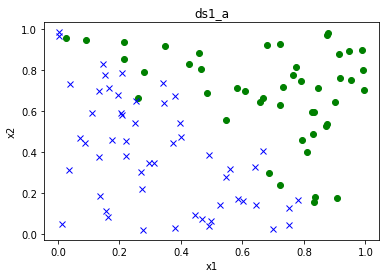

In [7]:
plot_data(Xa, Ya, 'ds1_a')

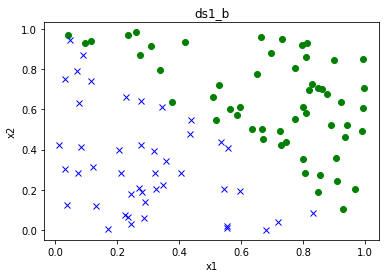

In [8]:
plot_data(Xb, Yb, 'ds1_b')

Plot shows that ds_a and ds_b have similar distribution, so the problem is not on the data set.

Print parameters when algorithm learning.

In [9]:
def logistic_regression_print(X, Y):
    '''
    A print version of logsitic regression
    which as same as algorithm in p01_lr.py
    but it can print some parameters when running
    '''
    
    def calc_grad(X, Y, theta):
        m, n = X.shape

        margins = Y * X.dot(theta)
        probs = 1. / (1 + np.exp(margins))
        grad = -(1./m) * (X.T.dot(probs * Y))

        return grad, probs, margins
    
    m, n = X.shape
    theta = np.zeros(n)
    learning_rate = 10

    i = 0
    while True:
        i += 1
        prev_theta = theta
        grad, probs, margins = calc_grad(X, Y, theta)
        theta = theta - learning_rate * grad
        theta_gap = np.linalg.norm(prev_theta - theta)
        if i % 10000 == 0:
            print('Finished %d iterations' % i)
            # print theta, gap, grad, probs, margins
            print('theta: ', theta, '\ntheta gap: ', theta_gap,
                  '\ngrad: ', grad, '\nprobs: ', probs,
                  '\nmargins: ', margins, '\n')
        if theta_gap < 1e-15:
            print('Converged in %d iterations' % i)
            break
    return

In [10]:
logistic_regression_print(Xa, Ya)

Finished 10000 iterations
theta:  [-20.81394174  21.45250215  19.85155266] 
theta gap:  7.226491864936692e-07 
grad:  [ 4.15154546e-08 -4.27822247e-08 -4.08456455e-08] 
probs:  [9.58459855e-03 2.35003503e-04 1.87805938e-02 3.38755801e-09
 3.01709647e-03 1.03898561e-01 5.60324684e-02 1.33905441e-04
 2.37284172e-01 2.13567063e-02 5.56258342e-06 5.30166197e-04
 9.06714952e-03 8.14262053e-04 2.22826669e-01 9.10762727e-03
 8.74194776e-05 7.90700913e-01 2.45242934e-08 4.74487689e-03
 1.24477629e-04 1.30627000e-03 1.53301676e-02 5.30848404e-07
 7.22499519e-02 7.96063684e-03 8.18675773e-03 6.64920586e-01
 6.01633832e-06 7.66266769e-05 1.25570829e-03 7.58067573e-01
 4.51099970e-01 7.35957110e-02 2.57845310e-05 4.94068037e-07
 7.64590847e-04 1.98089047e-06 6.58740596e-07 5.39220449e-01
 8.66873347e-07 4.66001810e-05 1.08453571e-05 1.70397093e-04
 8.34022182e-01 4.01492780e-02 5.15306053e-03 3.69852324e-02
 1.07050289e-01 7.89363846e-03 6.25534510e-06 2.82571508e-01
 1.81723860e-01 2.55095715e-07

In [11]:
logistic_regression_print(Xb, Yb)

Finished 10000 iterations
theta:  [-52.74109217  52.92982273  52.69691453] 
theta gap:  0.003361039469518825 
grad:  [ 0.00019399 -0.00019355 -0.00019461] 
probs:  [1.60781163e-05 2.88793319e-01 7.22549611e-18 1.16553979e-10
 1.92932169e-15 1.51297562e-01 5.26859357e-08 4.06684209e-01
 9.11430490e-06 5.66397312e-14 1.32539864e-05 9.50880919e-10
 1.02231164e-09 6.77682921e-05 2.22506131e-06 1.24292660e-19
 2.31693797e-05 1.56851956e-04 6.48682666e-13 5.18759343e-16
 2.87901125e-03 1.49347534e-07 9.07050972e-04 4.23537260e-20
 1.09869887e-15 1.15678950e-13 4.08020388e-01 3.91003785e-16
 1.84623791e-10 4.99454209e-02 2.40851905e-16 1.27724850e-01
 2.53172373e-06 8.03274590e-09 3.16326808e-08 1.60086763e-13
 1.61249923e-06 1.14281111e-13 1.96244681e-07 1.36206493e-01
 3.33885561e-17 8.35632324e-17 2.01259813e-11 1.27845759e-04
 1.37578242e-14 1.24194868e-04 3.19818166e-06 1.71145315e-10
 1.22691608e-12 2.35946190e-07 1.80912737e-13 2.11759588e-01
 2.79698959e-12 1.31536204e-03 1.00820758e-

Finished 40000 iterations
theta:  [-87.70771189  87.87276307  87.73897393] 
theta gap:  0.00137040952812708 
grad:  [ 7.90651647e-05 -7.91523106e-05 -7.91443884e-05] 
probs:  [9.95653955e-09 1.81416108e-01 3.26157351e-29 2.78521339e-17
 3.44500168e-25 5.17753960e-02 7.11275605e-13 3.69119067e-01
 4.38703772e-09 9.16757456e-23 7.92499006e-09 1.00251810e-15
 1.09841026e-15 1.24520584e-07 3.74620811e-10 3.53740278e-32
 1.83140851e-08 4.80871900e-07 5.26493971e-21 3.91056328e-26
 6.19487469e-05 4.46492745e-12 8.44876574e-06 6.41964913e-33
 1.27850201e-25 3.10631294e-22 3.28648770e-01 2.45106979e-26
 5.99215865e-17 6.82892209e-03 1.07230929e-26 4.35802921e-02
 4.62195387e-10 3.32843352e-14 3.56624607e-13 5.63687694e-22
 2.33476415e-10 3.12803491e-22 7.40199029e-12 4.99861475e-02
 4.06181517e-28 1.78094197e-27 1.77403446e-18 3.78968020e-07
 9.65036248e-24 3.34672936e-07 6.56007303e-10 5.56432748e-17
 1.52500691e-20 9.46272104e-12 6.74828149e-22 9.79854899e-02
 6.30574873e-20 1.70803983e-05 1

Finished 70000 iterations
theta:  [-107.04156569  107.25200975  107.08020705] 
theta gap:  0.0009315199306059814 
grad:  [ 5.37193268e-05 -5.39154728e-05 -5.37089335e-05] 
probs:  [1.72402427e-10 1.37675204e-01 1.69882549e-35 6.27505832e-21
 1.39624468e-30 2.81013123e-02 1.50245139e-15 3.42253892e-01
 6.26376746e-11 1.27423260e-27 1.29046754e-10 4.96167657e-19
 5.55229367e-19 3.71664737e-09 3.14638510e-12 4.13259993e-39
 3.59810159e-10 1.93628439e-08 1.78778395e-25 9.80706483e-32
 7.33651875e-06 1.40914593e-14 6.41164905e-07 5.09251948e-40
 4.17212472e-31 5.64439055e-27 2.94714092e-01 5.50047957e-32
 1.59840298e-20 2.28528544e-03 2.00681664e-32 2.23754695e-02
 4.03414241e-12 3.54292871e-17 6.38387292e-16 1.15659770e-26
 1.74902072e-12 5.68740705e-27 2.60702702e-14 2.65381695e-02
 3.69215274e-34 2.26421020e-33 2.14846155e-22 1.44295097e-08
 8.07235315e-29 1.24301703e-08 6.24316429e-12 1.45768733e-20
 6.54602900e-25 3.52547841e-14 1.44181835e-26 6.27317448e-02
 3.69529472e-24 1.50952632e

KeyboardInterrupt: 

Message shows, compared to A, B has:
1. bigger and margins
2. smaller prob
3. bigger grad
4. increasing theta
5. every margin is positive

In this logistic regression, we have:
\begin{align}
\hat \gamma^{(i)} = & \ y^{(i)} (\theta^T x^{(i)} + b) \tag{1} \\
p^{(i)} = & \ \frac {1} {1 + \exp (\hat \gamma^{(i)})} \tag{2} \\
\triangledown = & \ - \frac {1} {m} \sum_{i=1}^m y^{(i)} x^{(i)} p^{(i)} \tag{3} \\
\theta : = & \ \theta - \alpha \triangledown \tag{4}
\end{align}

It means what we want is:
$$ \arg \max_\theta \hat \gamma \tag{5} $$

In fact, our program will stop automatically only if $ \alpha \triangledown $ is small enough. Actually, the learning rate, $ \alpha $, which in our program is too large to automatically stop.

But this dosen't explain why A can stop automatically and B can't (they have same $ \alpha $), so the real different is in the $ \triangledown $.

In the case of B:

Because every margin is positive, means:
$$ \hat \gamma ^{(i)} \geq 0 \ \text{for every} \ i $$

So, the only way to increase $ \hat \gamma $ is to increase $ \parallel \theta \parallel $ and $ \parallel b \parallel $, this led to an unlimited increase in theta.

In the case of A:

Observe the image of data set A, we can findout no matter how hard the algorithm works on A, it will always misclassify some points. What's more, under the best predictions that the algorithm can make, both some positive and negative points are misclassified.

Consider (2), misclassified points have larger $ p^{(i)} $, so they have a greater weight in gradient $ \triangledown $. It turns out that our decision boundary is controlled by those misclassified points, and algorithm will try to find the boundary between these points.

Misclassified points also help algorithm stop increasing theta. When algorithm try to increase $ \parallel \theta \parallel $ and $ \parallel b \parallel $, in the case of these misclassified points, $ \hat \gamma^{(i)} $ will keep decreasing, this contradicts (5). In the other hand, because misclassified points have a greater weight in gradient, our algorithm is more likely to increase $ \hat \gamma^{(i)} $ of these points ($ \hat \gamma^{(i)} < 0 $), rather than increase $ \parallel \theta \parallel $ and $ \parallel b \parallel $.

### (c)

In [4]:
import random

In [59]:
def logistic_regression_justify(X, Y,
                                constant_learning_rate=10,
                                decreasing_learnging_rate=False,
                                linear_scaling_input=False,
                                regular_loss=False,
                                noise=False):
    '''
    A modifed version of logsitic regression
    only to justify my answers
    '''
    
    def calc_grad(X, Y, theta):
        m, n = X.shape

        margins = Y * X.dot(theta)
        probs = 1. / (1 + np.exp(margins))
        grad = -(1./m) * (X.T.dot(probs * Y))

        return grad
    
    def plot_data(x, y, title=None):
        plt.figure()
        plt.plot(x[y == 1, -2], x[y == 1, -1], 'go', linewidth=2)
        plt.plot(x[y == -1, -2], x[y == -1, -1], 'bx', linewidth=2)
        plt.xlabel('x1')
        plt.ylabel('x2')
        if not title == None: plt.title(title)
    
    # linear scaling input
    if linear_scaling_input:
        for xi in X:
            xi[1:] *= 0.5
    
    # gaussian noise
    if noise:
        mu = 0
        sigma = 0.05
        for xi in X:
            xi[-1] += random.gauss(mu, sigma)
            xi[-2] += random.gauss(mu, sigma)
        plot_data(X, Y, title='noise')
    
    m, n = X.shape
    theta = np.zeros(n)
    
    # constant learning rate
    learning_rate = constant_learning_rate

    i = 0
    while True:
        i += 1
        prev_theta = theta
        grad = calc_grad(X, Y, theta)
        
        # decreasing learning rate
        if decreasing_learnging_rate:
            learning_rate = 1 / i**3 * constant_learning_rate
        
        theta = theta - learning_rate * grad
        
        # regualr loss
        if regular_loss:
            norm_theta = np.linalg.norm(theta)**2
            if norm_theta == 0: norm_theta = 1
            theta /= norm_theta
        
        if i % 10000 == 0:
            print('Finished %d iterations' % i)
        if np.linalg.norm(prev_theta - theta) < 1e-15:
            print('Converged in %d iterations' % i)
            break
    return

#### i

No (or yes?).

Consider (4), if we want our algorithm stop automatically, $ \alpha \triangledown $ should small enough.

In the case of B, although $ \triangledown $ is large, we still can reduce $ \alpha $ to achieve it. But a constant learning rate just a scalar of $ \triangledown $.

So, if we have a small $ \alpha $, in some very lucky situations, it may just exist a small enough $ \triangledown $, resulting in $ \alpha \triangledown $ being small enough to stop the algorithm...(I guess)

In [65]:
logistic_regression_justify(Xb, Yb, constant_learning_rate=0.1)

Finished 10000 iterations
Finished 20000 iterations
Finished 30000 iterations
Finished 40000 iterations
Finished 50000 iterations
Finished 60000 iterations
Finished 70000 iterations
Finished 80000 iterations
Finished 90000 iterations
Finished 100000 iterations
Finished 110000 iterations
Finished 120000 iterations
Finished 130000 iterations
Finished 140000 iterations
Finished 150000 iterations
Finished 160000 iterations
Finished 170000 iterations
Finished 180000 iterations
Finished 190000 iterations
Finished 200000 iterations
Finished 210000 iterations
Finished 220000 iterations


KeyboardInterrupt: 

#### ii

Yes.

If we keep decreasing learning rate faster than theta, eventually we will get a learning rate that makes $ \alpha \triangledown $ small enough to stop algorithm.

In [55]:
logistic_regression_justify(Xb, Yb, decreasing_learnging_rate=True)

Finished 10000 iterations
Finished 20000 iterations
Finished 30000 iterations
Finished 40000 iterations
Finished 50000 iterations
Finished 60000 iterations
Finished 70000 iterations
Finished 80000 iterations
Finished 90000 iterations
Finished 100000 iterations
Finished 110000 iterations
Finished 120000 iterations
Converged in 122421 iterations


#### iii

No (or yes?).

Consider (1), scaling input feature just another way to scaling theta.

But, consider (4), small input feature can help $ \triangledown $ become smaller, then $ \alpha \triangledown $ may small enough to stop algorithm.

Obviously, this isn't a good way to solve this problem ...

In [66]:
logistic_regression_justify(Xb, Yb, linear_scaling_input=True)

Finished 10000 iterations
Finished 20000 iterations
Finished 30000 iterations
Finished 40000 iterations
Finished 50000 iterations
Finished 60000 iterations
Finished 70000 iterations
Finished 80000 iterations
Finished 90000 iterations
Finished 100000 iterations
Finished 110000 iterations
Finished 120000 iterations
Finished 130000 iterations
Finished 140000 iterations
Finished 150000 iterations
Finished 160000 iterations
Converged in 164349 iterations


#### iv

Yes.

Adding a regularization term is an effective way to avoid unlimited increasing of theta. So this modification can let algorithm stop automatically.

In [57]:
logistic_regression_justify(Xb, Yb, regular_loss=True)

Converged in 48 iterations


#### v

Yes.

Add zero-mean Gaussian noise will make the data set B similar to the data set A, there are always some points that algorithm will misclassify.

So, simillar to the case of A, program will stop automatically.

Finished 10000 iterations
Converged in 16033 iterations


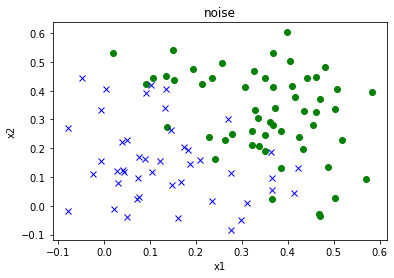

In [58]:
logistic_regression_justify(Xb, Yb, noise=True)

### (d)

No.

Hinge loss:
$$ L(y) = \max(0, 1 - \hat y y) $$

if a point $ i $ is correctly classified, then $ L(y^{(i)}) = 0 $, and algorithm will stop on it, instead of increasing $ \theta $.